In [1]:
import numpy as np
import matplotlib.pyplot as plt

from classes.projectile import Projectile
from classes.constant import *
from classes import trajectories as Trajectory

projectile = Projectile("S&B FMJ 147grs", cal_inch=0.308,
                        m_grs=147, SD_inch=0.221, Cd=0.5)

In [2]:
def customDragFunction(v_vec, Cd, A):
    v = np.linalg.norm(v_vec)
    mach = v/MACH
    F = (np.e-1)**mach - 1
    F *= -1 * RHO * A * Cd
    F *= (v_vec/mach)

    return F*MACH

Redefinování tabulky naměřených hodnot

In [3]:
v_s = Trajectory.create_vs(
    (850, 775, 704, 636, 573, 512, 455, 400, 350),
    (0, 100, 200, 300, 400, 500, 600, 700, 800)
)

Vytvoření tří typů trajektorií k porovnání mezi sebou

In [4]:
v_t = Trajectory.create_vt_from_vs(v_s)
f_t = Trajectory.createDragFunction(v_t, projectile=projectile, deg=4)

# Trajektorie vytvořená kompletním přepisem odporové funkce
app850poly = Trajectory.trajectory(
    projectile, alpha0=0, y0=0, dragSource=f_t, v=850)

# Trajektorie vytvořená základním způsobem pomocí kubické odporové funkce
cubic850 = Trajectory.trajectory(projectile, 850, 0, 0)

# Trajektorie vytvořená pomocí nové funkce (exponenciální)
custom850 = Trajectory.trajectory(
    projectile, 850, 0, 0, dragType="CUSTOM", dragFunction=customDragFunction)

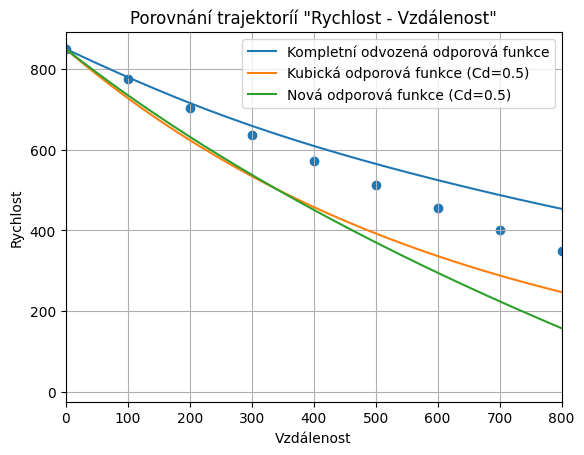

In [5]:
plt.title("Porovnání trajektoríí \"Rychlost - Vzdálenost\"")

plt.plot(app850poly[:, 0], Trajectory.normTwoCols(app850poly, cols=(2, 3))[
         :, 2], label="Kompletní odvozená odporová funkce")
plt.plot(cubic850[:, 0], Trajectory.normTwoCols(cubic850, cols=(2, 3))[
         :, 2], label="Kubická odporová funkce (Cd=0.5)")
plt.plot(custom850[:, 0], Trajectory.normTwoCols(custom850, cols=(2, 3))[
         :, 2], label="Nová odporová funkce (Cd=0.5)")

plt.scatter(v_s[:, 1], v_s[:, 0])

plt.xlim(0, 800)
plt.ylim()

plt.xlabel("Vzdálenost")
plt.ylabel("Rychlost")

plt.grid(True)
plt.legend()
plt.show()

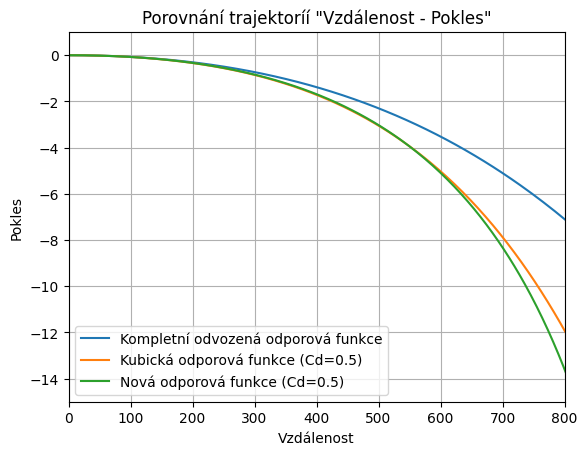

In [6]:
plt.title("Porovnání trajektoríí \"Vzdálenost - Pokles\"")

plt.plot(app850poly[:, 0], app850poly[:, 1],
         label="Kompletní odvozená odporová funkce")
plt.plot(cubic850[:, 0], cubic850[:, 1],
         label="Kubická odporová funkce (Cd=0.5)")
plt.plot(custom850[:, 0], custom850[:, 1],
         label="Nová odporová funkce (Cd=0.5)")


plt.xlim(0, 800)
plt.ylim(-15, 1)

plt.xlabel("Vzdálenost")
plt.ylabel("Pokles")

plt.grid(True)
plt.legend()
plt.show()